In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px





In [74]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [76]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [77]:
churn_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# list_category = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# churn_data[list_category] = churn_data[list_category].astype('category')
# churn_data.info()

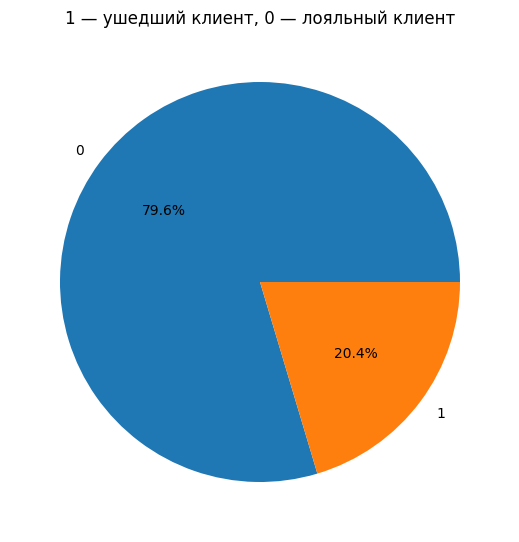

In [78]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий
# по соотношению.

exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=exited.index,
    autopct='%.1f%%',
);
axes.set_title('1 — ушедший клиент, 0 — лояльный клиент');

# В банке 20% клиентов - это ушедшие, т.е. каждый пятый клиент меняет банк.

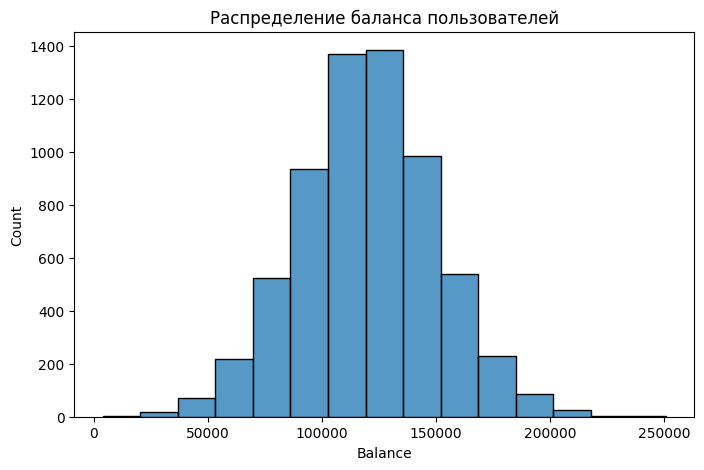

In [81]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых
# на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

balance2500 = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(8, 5))
hist = sns.histplot(
    data=balance2500,
    x='Balance',
    bins=15
);

hist.set_title('Распределение баланса пользователей');

# Клиенты в диапазоне 100-120 т.р. До 30 т.р. и более 200 т.р. доля очень мала

C:\Users\Eduard\AppData\Local\Temp\ipykernel_4532\1574362972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance2500['Exited_descr'] = balance2500['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Non-loyal')


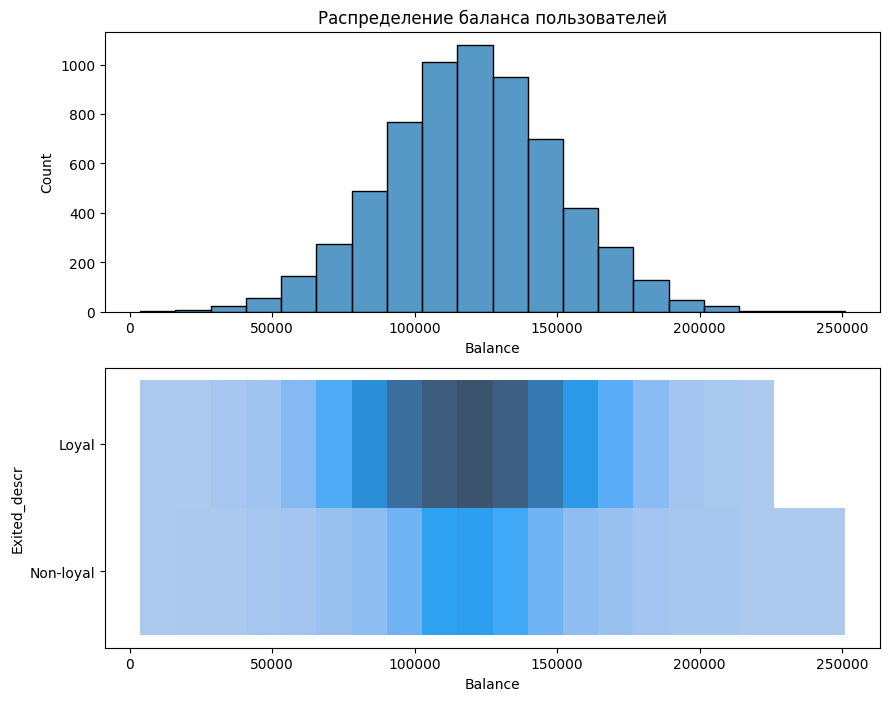

In [86]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите,
# с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

balance2500['Exited_descr'] = balance2500['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Non-loyal')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# fig = plt.figure(figsize=(8, 5))
sns.histplot(
    data=balance2500,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=balance2500,
    x='Balance',
    y='Exited_descr',
    bins=20,
    ax=axes[1]
);

# Клиенты, делающие вклады на суммы в диапазоне 80-160 тыс. руб. скорее станут лоляьными и 
# сохранят приверженность банку. Для клиентов на суммах до 50 т.р. и свыше 200 т.р. вероятность 
# ухода клиента существенно выше (по текущей аналитке приблизительно 50%). Скорее всего продукты банка 
# и сервис банка не соответсвуют ожиданиям клиентов.

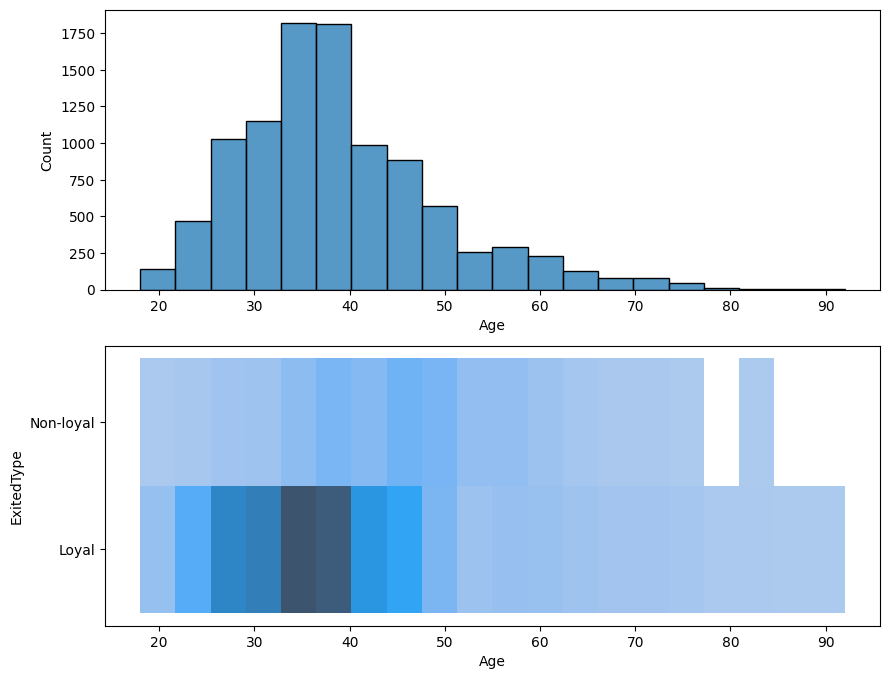

In [98]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе
# больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

churn_data['ExitedType'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Non-loyal')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=churn_data,
    x='Age',
    bins=20,
    ax=axes[0]
)
sns.histplot(
    data=churn_data,
    x='Age',
    y='ExitedType',
    bins=20,
    ax=axes[1]
)
hist.set_title('Распределение возраста в разрезе признака оттока');

# Вывод после следующей диаграммы

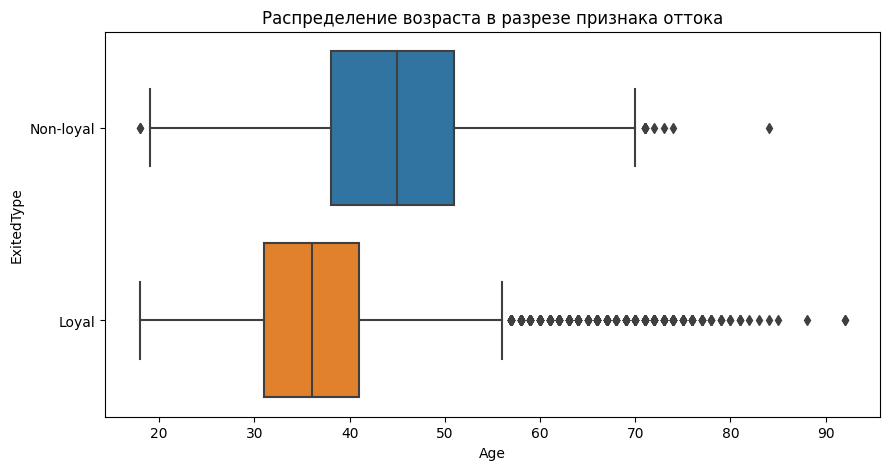

In [103]:
fig = plt.figure(figsize=(10, 5))
box = sns.boxplot(
    data=churn_data,
    x='Age',
    y='ExitedType'
)
box.set_title('Распределение возраста в разрезе признака оттока');

# В лоляьной группе больше выбросов.
# На клиентов старше 45 лет следуюет обратить особое внимание

In [99]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  ExitedType       10000 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


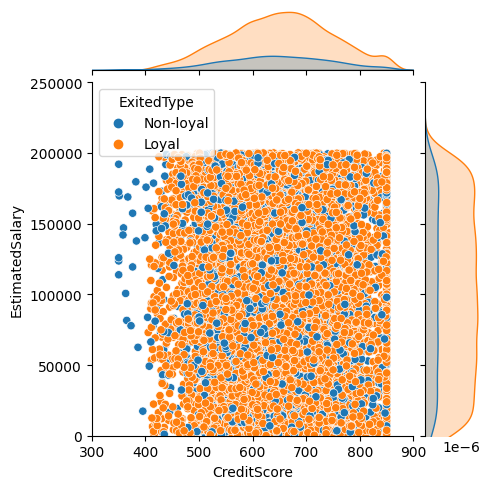

In [225]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов.
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='ExitedType',
    xlim = (300, 900),
    ylim = (0, 250000),
    height=5
);

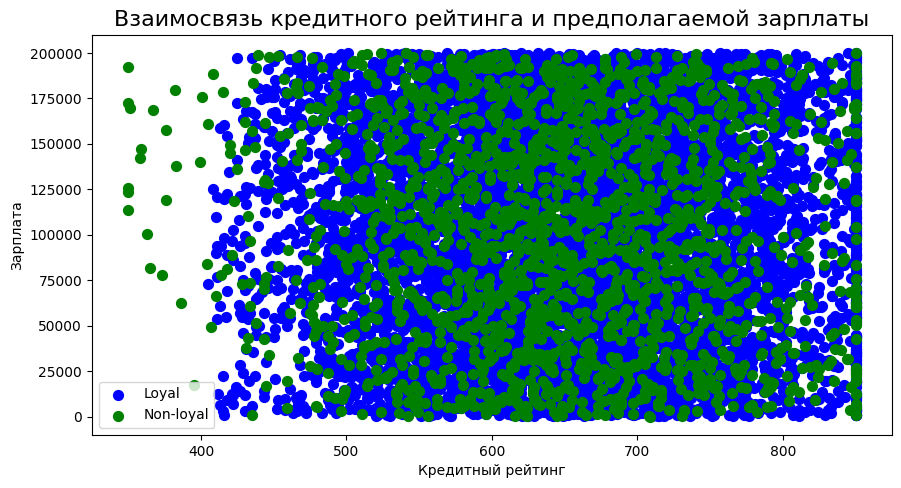

In [126]:
loyal_data = churn_data[churn_data['ExitedType'] == 'Loyal']
nonloyal_data = churn_data[churn_data['ExitedType'] == 'Non-loyal']
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
line1 = axes.scatter(
    x=loyal_data['CreditScore'],
    y=loyal_data['EstimatedSalary'],
    s=50,
    c='blue'
);
line2 = axes.scatter(
    x=nonloyal_data['CreditScore'],
    y=nonloyal_data['EstimatedSalary'],
    s=50,
    c='green'
);
axes.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', fontsize=16)
axes.set_xlabel('Кредитный рейтинг')
axes.set_ylabel('Зарплата')
# axes.set_yticks(range(0, 100000, 10000))
# axes.xaxis.set_tick_params(rotation=30)
# axes.grid()
axes.legend([line1, line2], ['Loyal', 'Non-loyal']);

In [ ]:
# Очевидной взаимосвязи нет. Но еле улавлимая связь: наблюдается концетрация лояльных клиентов
# в средней зоне кредитного рейтинга.

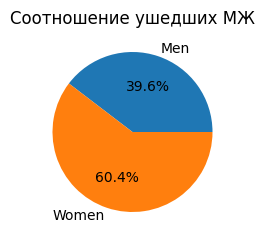

In [143]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

men_nonloyal = churn_data[churn_data['Gender'] == 'Male']['Exited'].mean()
women_nonloyal = churn_data[churn_data['Gender'] == 'Female']['Exited'].mean()
fig = plt.figure(figsize=(2, 2))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    [men_nonloyal, women_nonloyal],
    labels=['Men', 'Women'],
    autopct='%.1f%%',
);
axes.set_title('Соотношение ушедших МЖ');

In [ ]:
# Чаще уходят женщины

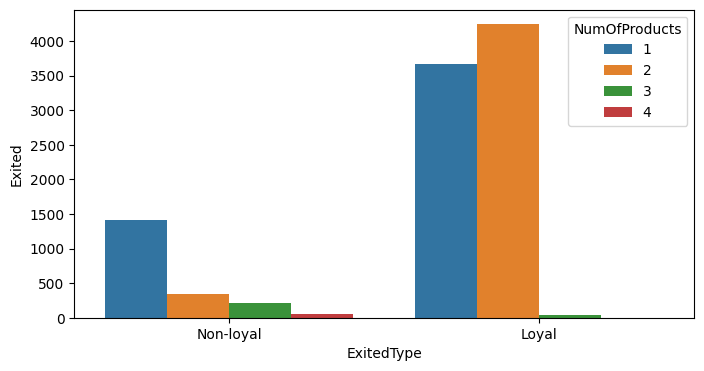

In [236]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

fig = plt.figure(figsize=(8, 4))
bars = sns.barplot(
    data=churn_data,
    x='ExitedType',
    y='Exited',
    hue='NumOfProducts',
    estimator='size'
);

In [ ]:
# Нибольший отток клиентов при приобритении одного продукта и 3-4. Клиенты, оформившие 4 прдодукта все сменили
# банк

In [223]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedType
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Non-loyal
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Non-loyal
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal


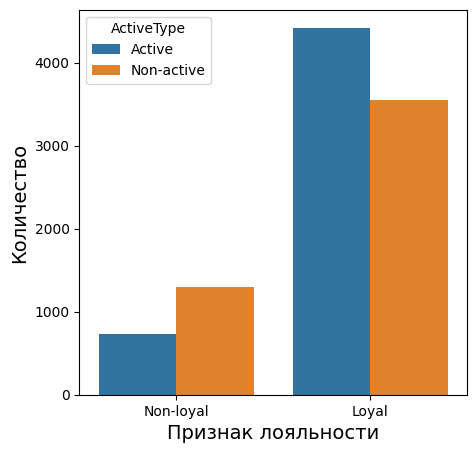

In [362]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму,
# иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# churn_data['ActiveType'] = churn_data['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Non-active')
# fig = plt.figure(figsize=(5, 5))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
bar = sns.barplot(
    data=churn_data,
    x='ExitedType',
    y='IsActiveMember',
    hue='ActiveType',
    estimator='size',
    dodge=True,
    ax=axes[0]
);
bar.set_xlabel('Признак лояльности', fontsize=14);
bar.set_ylabel('Количество', fontsize=14);

pie = plt.pie(
    
)

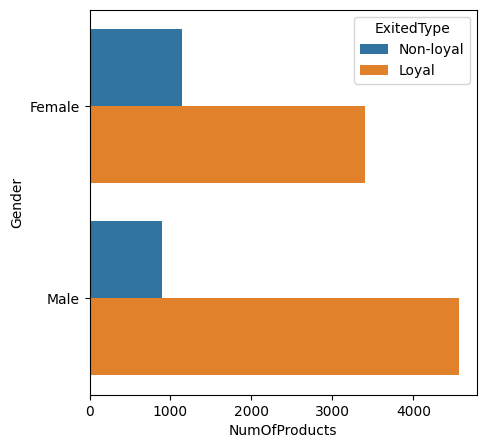

In [371]:
fig = plt.figure(figsize=(5, 5))
bars = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Gender',
    hue='ExitedType',
    estimator='size',
    dodge=True
);


In [419]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму,
# иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# churn_data['ActiveType'] = churn_data['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Non-active')
fig = plt.figure(figsize=(5, 5))
data = churn_data.groupby(by='ExitedType').agg(['count', 'sum'])
# display(data['Exited']['count'])
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# bar = plt.bar(
#     x=churn_data['ExitedType'],
#     height=churn_data['IsActiveMember'],
# );
# bar.set_xlabel('Признак лояльности', fontsize=14);
# bar.set_ylabel('Количество', fontsize=14);

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# bar = sns.barplot(
#     data=data,
#     x=data.index,
#     y=['Exited']['count'],
#     hue='IsActiveMember',
#     # estimator='size',
#     dodge=True,
#     # ax=axes[0]
# );
# bar.set_xlabel('Признак лояльности', fontsize=14);
# bar.set_ylabel('Количество', fontsize=14);


<Figure size 500x500 with 0 Axes>

In [384]:
# display(data['Exited']['count'])
display(data)

CustomerId               Surname  \
                count           sum   count   
ExitedType                                    
Loyal            7963  124948769842    7963   
Non-loyal        2037   31960635852    2037   

                                                              CreditScore  \
                                                          sum       count   
ExitedType                                                                  
Loyal       HillBoniMitchellBartlettHeH?BearceAndrewsKayCh...        7963   
Non-loyal   HargraveOnioChuObinnaRomeoGerasimovAzikiweLomb...        2037   

                    Geography  \
                sum     count   
ExitedType                      
Loyal       5190707      7963   
Non-loyal   1314581      2037   

                                                              Gender  \
                                                          sum  count   
ExitedType                                                             
Loyal       SpainFranceSpainFranceFranceFranceFranceSpainF...   7963   
Non-loyal   FranceFranceSpainGermanyGermanySpainSpainFranc...   2037   

                                                               ... HasCrCard  \
                                                          sum  ...     count   
ExitedType                                                     ...             
Loyal       FemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFe...  ...      7963   
Non-loyal   FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...  ...      2037   

                 IsActiveMember       EstimatedSalary               Exited  \
             sum          count   sum           count           sum  count   
ExitedType                                                                   
Loyal       5631           7963  4416            7963  7.942168e+08   7963   
Non-loyal   1424           2037   735            2037  2.066856e+08   2037   

                 ActiveType                                                     
             sum      count                                                sum  
ExitedType                                                                      
Loyal          0       7963  ActiveNon-activeActiveActiveActiveActiveNon-ac...  
Non-loyal   2037       2037  ActiveNon-activeNon-activeNon-activeNon-active...  

[2 rows x 28 columns]

ExitedType
Loyal        4416
Non-loyal     735
Name: sum, dtype: int64

ExitedType
Loyal        7963
Non-loyal    2037
Name: count, dtype: int64

ExitedType
Loyal        0.445435
Non-loyal    0.639175
dtype: float64

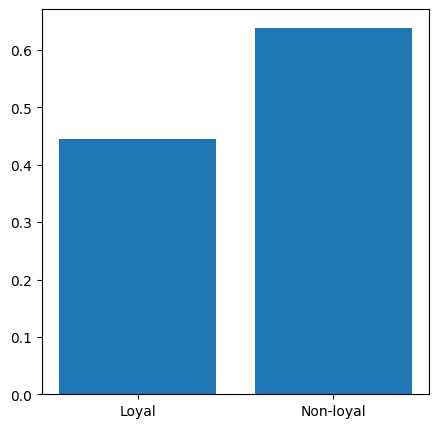

In [421]:
fig = plt.figure(figsize=(5, 5))
total = data['IsActiveMember'].loc[:, 'count'].sum()
nonactiv = 1 - data['IsActiveMember'].loc[:, 'sum'] / total
# nonactiv_loyal = nonactiv
# nonactiv_nonloyal = 1 - data['IsActiveMember']['sum'][1] / total
display(data['IsActiveMember'].loc[:, 'sum'])
display(data['IsActiveMember'].loc[:, 'count'])
display(1 - data['IsActiveMember'].loc[:, 'sum'] / data['IsActiveMember'].loc[:, 'count'])
data2 = 1 - data['IsActiveMember'].loc[:, 'sum'] / data['IsActiveMember'].loc[:, 'count']

bar = plt.bar(
    x=data2.index,
    height=data2,
)

# Банку необходимо увеличить число активных клиентов в возрасте старше 40 лет и особое внимание
# при возрасте старше от 48-50 лет, имеющие только 1 продукт

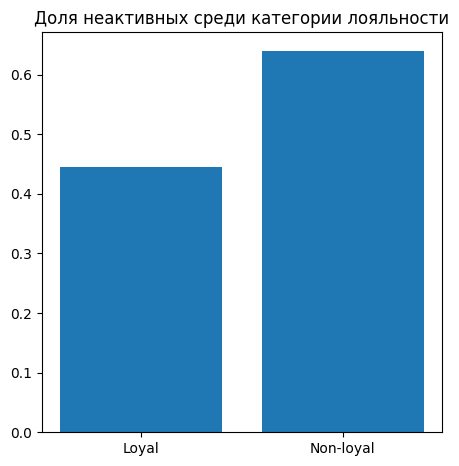

In [430]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму,
# иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# У меня возникли сложности с данным заданием.

data = churn_data.groupby(by='ExitedType').agg(['count', 'sum'])
active_by_exited = data['IsActiveMember'].loc[:, 'sum']
total_by_exited = data['IsActiveMember'].loc[:, 'count']
nonactiv_by_exited = 1 - active_by_exited / total_by_exited

fig = plt.figure(figsize=(4, 4))
bars = fig.add_axes((0, 0, 1, 1))
bars.bar(
    x=nonactiv_by_exited.index,
    height=nonactiv_by_exited
)
bars.set_title('Доля неактивных среди категории лояльности');

# Банку необходимо увеличить число активных клиентов в возрасте старше 40 лет и особое внимание
# при возрасте старше от 48-50 лет, имеющие только 1 продукт

In [432]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitedType,ActiveType
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Non-loyal,Active
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Non-loyal,Non-active
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Non-active
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Loyal,Non-active
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Loyal,Active
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Non-loyal,Active
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Non-loyal,Non-active


In [467]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму,
# которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

country_exeted = churn_data.groupby(by='Geography', as_index=False).mean()
display(country_exeted)
fig = px.choropleth(
    country_exeted,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    title='Доля ушедших клиентов',
    width=700,
    height=400,
    color_continuous_scale='temps'
)

fig.show();

# В Германии. Возможно в банке хуже работают с более благосостоятельными клиентами.


C:\Users\Eduard\AppData\Local\Temp\ipykernel_4532\2304216004.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Geography,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
1,Germany,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
2,Spain,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


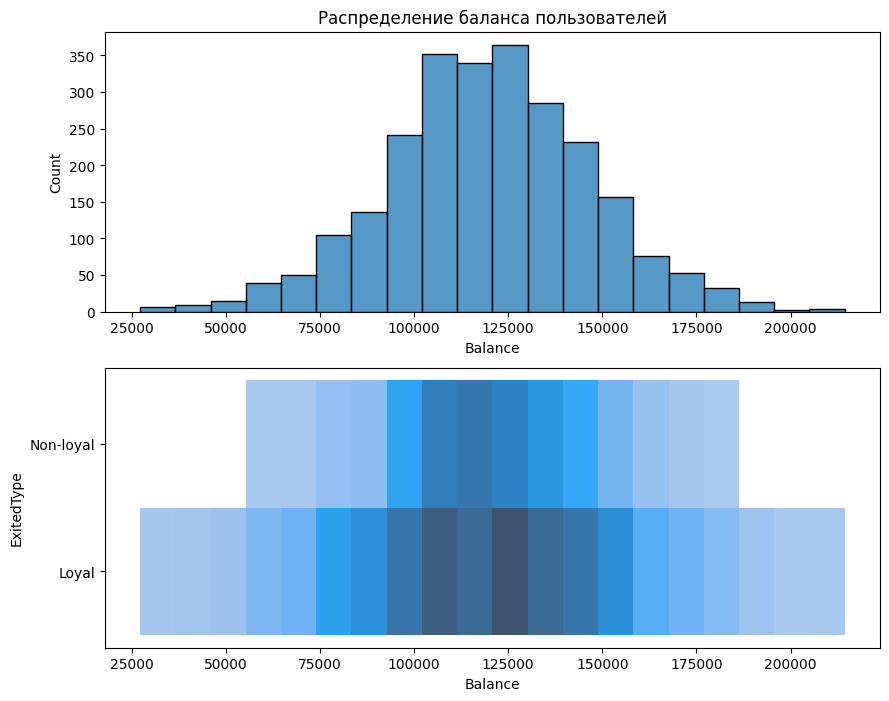

In [485]:
germany = churn_data[(churn_data['Geography'] == 'Germany') & (churn_data['Balance'] > 2500)]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# fig = plt.figure(figsize=(8, 5))
sns.histplot(
    data=germany,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=germany,
    x='Balance',
    y='ExitedType',
    bins=20,
    ax=axes[1]
);

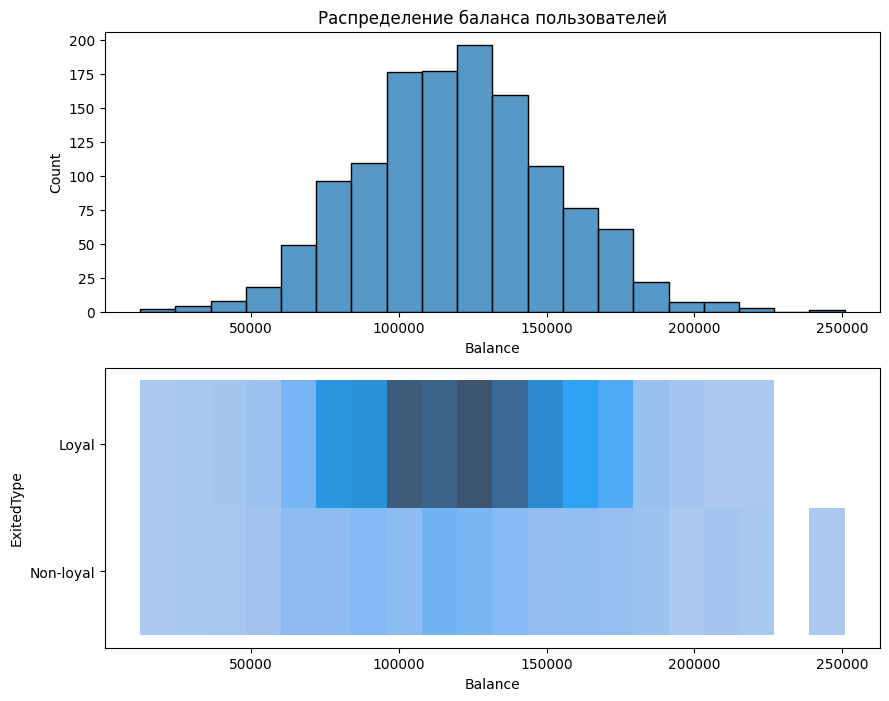

In [484]:
spain = churn_data[(churn_data['Geography'] == 'Spain') & (churn_data['Balance'] > 2500)]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# fig = plt.figure(figsize=(8, 5))
sns.histplot(
    data=spain,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=spain,
    x='Balance',
    y='ExitedType',
    bins=20,
    ax=axes[1]
);

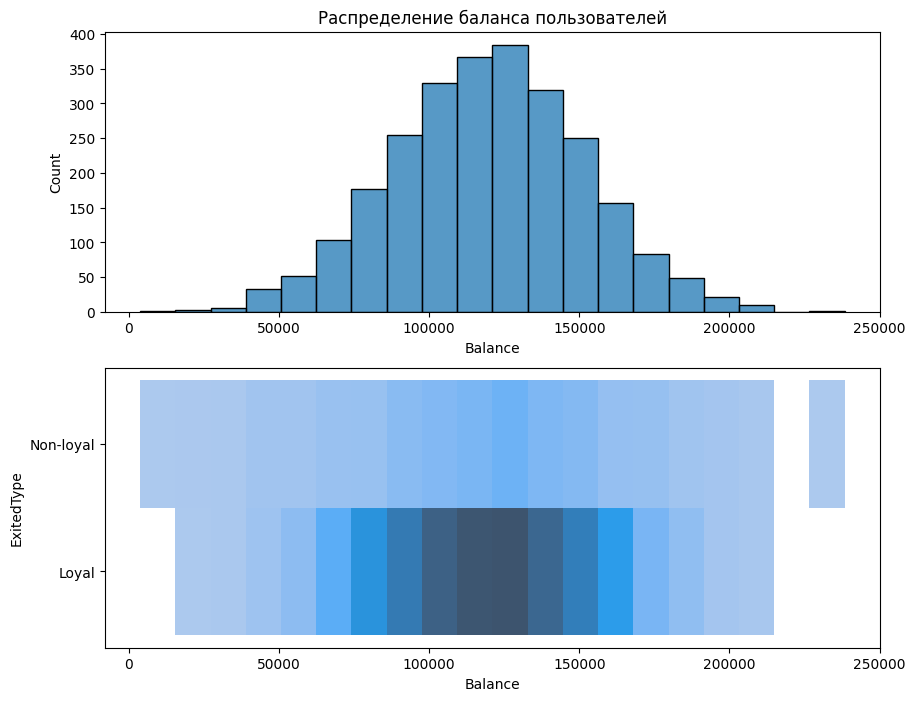

In [483]:
france = churn_data[(churn_data['Geography'] == 'France') & (churn_data['Balance'] > 2500)]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# fig = plt.figure(figsize=(8, 5))
sns.histplot(
    data=france,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей');

sns.histplot(
    data=france,
    x='Balance',
    y='ExitedType',
    bins=20,
    ax=axes[1]
);

In [ ]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь
# функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу 
# CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [ ]:
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга
# (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется
# услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее
# по признаку оттока (Exited) — доля ушедших пользователей.

# На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.



In [490]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(lambda x: get_credit_score_cat(x)) 


In [493]:
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')

C:\Users\Eduard\AppData\Local\Temp\ipykernel_4532\1486564475.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



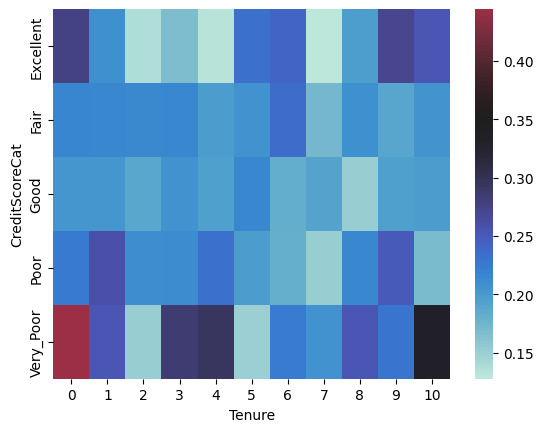

In [539]:
pivot_mean_values = churn_data.groupby(by='CreditScoreCat').mean()
pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
heatmap = sns.heatmap(pivot, center=0.35);

# Наибольшя концентрация уходящих клиентов с кредитным рейтингом Very_Poor и Excellent.
# Самая высокая доля клиентов с низким рейтингом на сроках до года (наибольшая), 3-4 года и 10 лет.
# Среди клиентов с высоким рейтингом также высокая концентрация на сроке до года (наибольшая),
# 5-6 и 9-10 лет.